In [52]:
import sys
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

sys.path.insert(0, '../')
import preprocess_csv as preprocess

def tokenizer(text):
    # token화
    RegTok = RegexpTokenizer("[\w']{3,}")
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    cachedStopWords = stopwords.words("english")
    english_stops = set(stopwords.words('english'))
    words = [word for word in tokens if (word not in english_stops) and len(word)>2]
    # porter stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token), words)))
    return features


def tsne_graph(tsne_2, lim=None):
    #filename = '/topic' + save_path[-1] + '_/t-SNE.png'
    x = tsne_2[:30, 0]
    y = tsne_2[:30, 1]

    plt.figure(figsize=(10, 6))
    plt.rcParams['axes.unicode_minus'] = False
    # if you use MacOS
    plt.rcParams['font.family'] = 'AppleGothic'
    # else if you use Windows
    # plt.rcParams['font.family'] = 'Malgun Gothic'

    tfig = sns.scatterplot(
        x=x, y=y,
        legend="full",
        alpha=0.3
    )
    tfig.set(title=title)
    
    tsne_fig = tfig.get_figure()
    #tsne_fig.savefig('./figure' + save_path + filename)


def show_tsne(data_path, save_path='./', n_components=2):
    papers = preprocess.extract_text(data_path)

    tfidf = TfidfVectorizer(tokenizer=tokenizer)
    papers_tfidf = tfidf.fit_transform(papers)
    print(papers_tfidf[:10])
    
    tsne = TSNE(n_components=n_components, perplexity=5.0, n_iter=5000, random_state=7)
    tsne_tfidf = tsne.fit_transform(papers_tfidf)
    print('TSNE dimension:', tsne_tfidf.shape)

    tsne_graph(tsne_tfidf)

In [111]:
papers = preprocess.extract_text('../data/topic2/trust_robot.csv')

tfidf = TfidfVectorizer(tokenizer=tokenizer)
papers_tfidf = tfidf.fit_transform(papers)
print(type(papers_tfidf[:10]))

<class 'scipy.sparse.csr.csr_matrix'>


In [112]:
tfidf_data = papers_tfidf.data
tfidf_data

array([0.06400814, 0.05216071, 0.04264734, ..., 0.05230512, 0.02195053,
       0.02269072])

In [83]:
tfidf_array = papers_tfidf.toarray()
for row in tfidf_array:
    for data in row:
        if data != 0:
            print(data)

0.7053113263641466
0.7624862585031248
0.6962449005202306
0.74537994125907
0.6957408881782196
0.6776584902871332
0.6751379703287295
0.779891433349413
0.7065609397434576
0.6808342207261769
0.664196532128242
0.7408313414735134
0.7585245774287621
0.7031201794798054
0.7254829763549319
0.6952686334657885
0.7972433783702148
0.7369569515074731
0.6772628010675811
0.7307330798324946
0.841498462734589
0.6952951231204431
0.6675301691328642
0.7047357245148363
0.7006217031584212
0.7601895100694512
0.6896693485462585
0.6910651081566166
0.6927888428939583
0.8517142222458284
0.7201528363932886
0.7016876850075933
0.7798437526619664
0.6584465622023795
0.7260027148867119
0.665385646757813
0.721585116139737
0.7152206248018894
0.7207047694383317
0.6737748101484229
0.6797480043762196
0.7000266166498508
0.6866088693907535
0.6614523367465017
0.693285946110846
0.7226566896916131
0.677978519480404
0.7486061402007944
0.6637239351202875
0.7234624650656353
0.7211551218685632
0.7836563079282787
0.7104248857428983
0.

0.20836872370654544
0.20800533149404823
0.208379217000005
0.20829897907389072
0.20864582228779407
0.2080648576960095
0.20837498620249448
0.20848452353534447
0.20819857565341612
0.20828562122846483
0.20868943733700154
0.20860268483477418
0.20850443905701044
0.20854249610537018
0.20862736075439983
0.20864582228779407
0.20784618169154434
0.2081309344283344
0.20809113838120455
0.20773458769139608
0.2083083112839408
0.20840103812689292
0.20809767886123196
0.2077902471962975
0.2085944736732616
0.2079974865070756
0.2083300913187232
0.20833350444143509
0.20801591665810631
0.20838595659531073
0.20854450453520212
0.20803397666505674
0.20860268483477418
0.20866031842118185
0.20829339369710712
0.2081262224146103
0.20856415904541184
0.20773458769139608
0.2080036062086373
0.208586579732408
0.20797248679010716
0.20774119373932395
0.20767869545082315
0.2083300853315499
0.20798962396678883
0.20775946748600804
0.20853504785821078
0.20780152153863285
0.20859797406279448
0.2080036062086373
0.2078755405771

0.1571578023154175
0.1571451509008985
0.15719838993570318
0.15710974391473964
0.15731463942902807
0.15708769561120858
0.15738274411421904
0.15702436491147828
0.15733823854635706
0.1572028339129565
0.15732291958965636
0.1571143052442238
0.15661252254422453
0.1564686548903102
0.15634026983182575
0.15628437528702713
0.15673925444118805
0.1567210315726957
0.15668814176746648
0.15672698033993712
0.15655523286360826
0.15696449031561802
0.1566841039140512
0.15626898541632112
0.1568284863376658
0.15664902942197861
0.15700817070510545
0.15652681484615655
0.15635570625552017
0.1564550922391999
0.15658644859283108
0.1562822371263873
0.15699953500295213
0.1568124268036461
0.15649198239583673
0.15639446673584284
0.15632690587051484
0.1567976992857176
0.1568284863376658
0.15627144649931468
0.1570093280366779
0.15681265312704964
0.15655930533303491
0.1568257673638057
0.1569079505305187
0.15664561604636834
0.1567876875474145
0.15651444107830914
0.1565336707357102
0.15667256602404053
0.1569557617389692

0.13125011194692404
0.13115964020214857
0.1308566943449195
0.1309338722646716
0.1306337720588584
0.13049728441986533
0.13110751585209796
0.13064437111267396
0.13060465291871678
0.1309488566939537
0.13060315535572103
0.13101910573596634
0.1309967497765615
0.1307621961459371
0.13120374020586295
0.13075418509984907
0.13089956902030392
0.1306750291576759
0.13087779203082825
0.13103761306913117
0.13116348749879822
0.1311460399491001
0.13057384377645945
0.1310804826291819
0.13117434437914002
0.131101839878312
0.13063604431270573
0.1307621961459371
0.13079398863254993
0.13058589391219946
0.13098565801791676
0.1309963062300974
0.13064366705742408
0.13086250014209308
0.13057734305153051
0.13109807100226112
0.1310924542439071
0.13108011565758268
0.13064437111267396
0.13074482588246736
0.1310260877346051
0.13101606642300617
0.13076288591769059
0.1308128093439808
0.13059312906714665
0.13084336220661363
0.1311594016475833
0.13123498987495733
0.1307474650537486
0.13083967136310776
0.1305544461046298

0.10569252709898082
0.10575714645029623
0.1056812300457473
0.10569113548105437
0.10584277166233398
0.10575869212136162
0.10572570115044054
0.10583136209536503
0.10570606473045491
0.10569930261932867
0.10575869212136162
0.1057878513489589
0.10575869212136162
0.10578884463228545
0.10574845999281333
0.10574236144392316
0.10579438209352286
0.10569252709898082
0.10567112039797776
0.10564598812853218
0.10583558115794572
0.10567180046118876
0.10570837605755867
0.10572305544736631
0.10567180046118876
0.10584024740827529
0.10575466535749946
0.10570990831773386
0.10570969188849458
0.10574017517095585
0.10567724191444408
0.10575869212136162
0.10581390024496024
0.10583664414044759
0.10574416805387593
0.10563349340679377
0.10582450665748896
0.10569930261932867
0.10569252709898082
0.10569736876373463
0.10565825207024114
0.10580259787324238
0.10567724191444408
0.10575869212136162
0.105797672218183
0.10573406468300599
0.10572735696561397
0.1057474786092453
0.10570849488952606
0.1058121982542068
0.1057

0.09263863278888931
0.09257910225089667
0.0925511468677718
0.09255165602272276
0.0925843578708062
0.09263877228227482
0.09257489502707014
0.09263809521376043
0.0926172854979074
0.09255510093748325
0.0926025300528916
0.09255954840111259
0.09262629579853089
0.09263020591218493
0.09257542634656571
0.09254292916347626
0.09264698380800021
0.09266273187975452
0.0925445840421876
0.09261489103099399
0.09261798192606653
0.09265997642832237
0.09254571157102574
0.09262719942308863
0.09264035122984542
0.09257462795114406
0.09259273170103198
0.09255534057622344
0.09254634549469944
0.09265904617739824
0.09255158966987397
0.09267686689213543
0.0925761794956663
0.09261798192606653
0.0925767136699878
0.09263579255231134
0.09259273170103198
0.09263020591218493
0.09264698380800021
0.09263760743493879
0.0925761794956663
0.09255510093748325
0.09255158966987397
0.09263867820508724
0.09255106813616096
0.09256769758041238
0.0925771139065273
0.09266590323276011
0.09254634549469944
0.09265488833632403
0.0925785

0.08306756080404559
0.08305348997017298
0.08310313819571807
0.08304661603795951
0.08306240142449035
0.08314030459333994
0.08313964288758081
0.08307931428381321
0.08303268406691208
0.08297267030912026
0.083031033982338
0.08299644256245634
0.08292480310647218
0.08290926063896449
0.0830070934321519
0.08298474404436597
0.08294616760895739
0.08303616042130817
0.08304614568658429
0.08297138461911288
0.08294145783607357
0.08290600751688149
0.08294907779295083
0.08295252092973115
0.08291837549677122
0.08303268406691208
0.08294058874478039
0.08299461909155877
0.0829831244931533
0.08302838900593036
0.08296548344061233
0.0829648491127158
0.08297396730084142
0.0829831244931533
0.0830298647427466
0.08302710796312483
0.08296690468929313
0.08302088096093581
0.08297889379200561
0.08298604761162416
0.08300185616805304
0.08303148575112901
0.08295562010356261
0.08301252757773543
0.08296592978941913
0.08302007158189562
0.08298477063618966
0.08293950165509396
0.08293808910325164
0.08297071511488113
0.08290

0.07509446223079412
0.07517167098687319
0.07502172662642542
0.07507305654444899
0.07499410434234545
0.0750305019948829
0.07498577014854682
0.07500811343701035
0.07499220485184004
0.07500061348551787
0.07498528845126477
0.07503838634502978
0.07502784079935425
0.0749886988733482
0.07505551053292697
0.07504590348725274
0.07502838946831748
0.07500645913994615
0.07499140338437359
0.07506665920635382
0.07504157440944036
0.0750739471003421
0.0750259943787506
0.07500015838021155
0.07505430120196478
0.0750546540497241
0.07506029612410767
0.07501595711938364
0.07502919906690055
0.07508592409363146
0.07509221372414451
0.07500835530732082
0.07498434848514392
0.0750725619184908
0.07507233913407631
0.07504436413012956
0.07501898343304067
0.07501768747835362
0.07499410434234545
0.075063683033538
0.07498565141281113
0.07498831074505412
0.07498831074505412
0.07500489812387665
0.07507200453424691
0.0750546540497241
0.07506420414732905
0.07499828160336934
0.07503160782163529
0.07506334981810092
0.0750219

0.07007387402150644
0.07007424945010612
0.0700917567770611
0.07008991046507415
0.07009685408062245
0.07009498355726904
0.07010023430684907
0.07009305693965721
0.07010804180050674
0.07006920068999023
0.07005663083634393
0.07008452734198028
0.07006172034609022
0.07005764560617912
0.07010398715160927
0.07008432883774643
0.0700860531347652
0.07010422311480731
0.0701097388750198
0.07009900686320228
0.07009305693965721
0.07009318813058495
0.07007716886386675
0.07005667709093233
0.07005705722663975
0.07005780340391528
0.07006811906004998
0.07005771316162898
0.07005586000958877
0.07009483564430644
0.07005646507601038
0.07000719388228735
0.07003560894871141
0.06998483099325906
0.07002737590104147
0.07003894311362945
0.07002184802136487
0.06997975623207409
0.06994979692304894
0.06996448783739245
0.06997241928380332
0.07000967387770776
0.06995072022202851
0.06996446885198841
0.07003767456563104
0.06996440938685802
0.07005064804171564
0.07005379980635928
0.06998912490658747
0.06995557415235876
0.0

0.06668178137418598
0.06672240608523154
0.06668377825553053
0.06672088813118082
0.06668108680187594
0.06669746169081096
0.06672194974277927
0.06670522612843277
0.06670896637615555
0.06670305864004679
0.06670798715713637
0.06669217325290966
0.0667235610225699
0.06669913961788435
0.06671310523706245
0.06671852314589859
0.06670942760411487
0.066682563969058
0.06669913961788435
0.06670462801576248
0.066682563969058
0.06671327639269484
0.06669389839059042
0.06669147681912163
0.06668108680187594
0.06671030108965688
0.06667772958082545
0.06672013831461679
0.06669913961788435
0.06670305864004679
0.06668443077186888
0.06669541931597883
0.06671582845014379
0.06670093310218152
0.06668913186197233
0.06668913186197233
0.06670522612843277
0.06670907248248316
0.06668520391769647
0.06671258755134053
0.0667039638966653
0.06667772958082545
0.06671258755134053
0.06670093310218152
0.06670522612843277
0.06670680830496174
0.06672083144729911
0.06668229175664053
0.06670493826289285
0.06668424122189606
0.0667

0.06296694885622527
0.06289428959101227
0.06293192116297733
0.06289551579946852
0.06294063599824948
0.06289419828944011
0.06288789609114549
0.06289958231090141
0.06288473830664117
0.0629045844062977
0.06289637114776447
0.06288764297639608
0.06289574887914871
0.06292322363076319
0.06293837933073154
0.06289107843493746
0.06293739006704213
0.0628804036179465
0.06296419098142485
0.06293321097194565
0.06292012804393363
0.0628150126388514
0.0628739225517093
0.06279500040567802
0.06285662813969567
0.0628605731525037
0.06282257397081291
0.06283621767072128
0.06286606742523512
0.06287783484989516
0.06282922502502163
0.0628150126388514
0.06283021214527242
0.06280122283218523
0.06278829160452742
0.0628150126388514
0.06285348548863
0.06287473829796582
0.06286553484528774
0.06285808903706157
0.06280375992110238
0.06286339329308312
0.06285403327131638
0.0628241007415106
0.0628454653725945
0.06283802685237139
0.06280805491497739
0.06286717333385362
0.06284870072614787
0.06281974695368875
0.0628003070

0.059308942812016006
0.059305596711367696
0.05930689415768965
0.05933115651834286
0.05930906370196162
0.05926548856783228
0.05929796230308788
0.05930215004163824
0.05928900735859568
0.059272529839016985
0.059262771941295436
0.0593025786803086
0.05929721976674093
0.05929947396461809
0.05928950585479044
0.05930247713007898
0.05929977880638665
0.05930062992276876
0.05929721976674093
0.05925971166308989
0.05926959412011545
0.05922699010832761
0.05925049487823722
0.059231000431706746
0.059230877520023185
0.05925766241480595
0.059241378204096556
0.05926475363448929
0.05928412446305061
0.059230115528533384
0.05923495570715247
0.05926548856783228
0.05924025509103207
0.05927341195978532
0.0592530337296058
0.05927341195978532
0.05922699010832761
0.059285227201905155
0.05928922238144944
0.05929851404674122
0.0592530337296058
0.05924155773696388
0.05926263164734653
0.05926313196863918
0.059237361031755004
0.059290504009721884
0.05923697883500671
0.05929115708199726
0.05924025509103207
0.0592647536

0.05602891547714367
0.056033517363088176
0.05600583074208649
0.055997032079161055
0.05601218079391064
0.056020097151325776
0.05602514625183918
0.05598959062224788
0.05602306548481907
0.05599821944731812
0.056009870651231086
0.05601963671281344
0.056028287332230656
0.055995973197968896
0.055984226473378064
0.056028127040867584
0.05602660686105062
0.05598673547098354
0.05603108190503759
0.05599214173320772
0.056007384626309345
0.05600177655423705
0.05598319787860521
0.05596050848412539
0.05596359212324172
0.05594678907769527
0.05595891725292512
0.05596284575059591
0.05598091503239223
0.055956762595081984
0.055953540466820995
0.05597404040562087
0.05597702970500765
0.055956707477954164
0.055966882999695655
0.055983318020151385
0.05597651701230362
0.055952418360423035
0.055980130712451844
0.055960817835780635
0.05597485847514544
0.05597584162047513
0.05597364716685534
0.05594656344208766
0.0559760396159332
0.055960297085777246
0.0559484905307363
0.05594757702409983
0.05596740866085061
0.05

0.05320243405507853
0.05318082482591625
0.05317087327176105
0.05315645125533538
0.05317029904994493
0.05318604718230865
0.05317839460654707
0.053203649594456406
0.05318542207307864
0.053184708873671695
0.05318625456662789
0.05317233450286865
0.05317113500137336
0.05317087327176105
0.05317422880267402
0.05316040222200747
0.05315942637718705
0.05317653304831263
0.053178284997899956
0.05318962081041448
0.05317455205537729
0.05316084363387635
0.053159513428291894
0.05319533748086037
0.05317111501183735
0.05318542207307864
0.05319491445002308
0.05320098601644085
0.0531617286302534
0.053202798370118196
0.05319774152227687
0.053162740232792785
0.05316706474933471
0.05316505695810387
0.05315956449083005
0.05318913668314794
0.05319780046309589
0.053161842617272206
0.05318604718230865
0.05315787865453084
0.05317463803211827
0.05317004753511066
0.053196498220662795
0.053166301537741364
0.053175901271251685
0.05318538799804112
0.053174757072562494
0.05317087327176105
0.053182157701603186
0.0531708

0.05078738193243073
0.050820286830041354
0.05080442196662047
0.0507708453196341
0.05077560750110755
0.05081396590377511
0.05080402306544482
0.05081364495511965
0.050802799543499665
0.050830356692642964
0.050830170174854916
0.05080931230571295
0.05078551372210739
0.050810833896145394
0.05079651291025092
0.05079066837485416
0.05080798121067996
0.050810833896145394
0.050795315832141814
0.05080686019030234
0.05079646158043455
0.050829501728368906
0.05077332353961456
0.050810466563255906
0.05082819219647233
0.05080163990682171
0.05077646602312444
0.050770137148649024
0.05078182892950828
0.05079218226576008
0.05079883953948548
0.05077513297401018
0.05080542076391998
0.0507770834135972
0.05081247474106018
0.05081031328271954
0.05082456752621254
0.05081592061347141
0.05080699354516964
0.050806816445334455
0.05080076248484727
0.05076976249624076
0.05080917041081085
0.05079000444971619
0.05077332353961456
0.050777675755090415
0.050790797292023196
0.05078123513916233
0.050820286830041354
0.050785

0.047238970920996576
0.04725612244752281
0.047269071353322714
0.04727289180991357
0.04725586292582039
0.04724087384326733
0.04722198107128847
0.047242792938337455
0.047216934960247536
0.047220334779562084
0.04721009213799425
0.047214279476637235
0.047242751421681176
0.04724567460816599
0.047242823233547525
0.047216928439102135
0.047236129829732985
0.04726096861109439
0.04724195049477633
0.047211462004180506
0.04723105986088373
0.04720470816416584
0.047238271870474725
0.04720229027264368
0.047259305859306794
0.04726797750441176
0.04724567460816599
0.04724187800090897
0.04721884618216022
0.047246344048163386
0.04721126622355836
0.047256829345871394
0.04722422596388883
0.04721500310496912
0.04721126622355836
0.047271134858490285
0.047213561394626846
0.04720774597350765
0.04723027986406953
0.047255516380675634
0.047236129829732985
0.04722928786295508
0.047248012939227375
0.04726797750441176
0.04723245432757943
0.047269071353322714
0.04724607285347683
0.04724857386830767
0.04723245432757943

0.043443224038819145
0.04344191825854408
0.04342125380916976
0.04343008256796214
0.0434312381619108
0.04343262950629805
0.04343913711925624
0.04343171001204609
0.04341524676106932
0.043423747661518707
0.043418866856373174
0.04342022282817584
0.04341524676106932
0.04341377377522638
0.04342648705051196
0.04345372319785592
0.04345670969014433
0.04340916715992891
0.04344113002613614
0.04344916231253042
0.043410631402797155
0.043454250831857305
0.043427736559428394
0.04341128013905689
0.04345644871638476
0.043428847897090526
0.04342858485048085
0.043431093395481304
0.0434280856003309
0.0434280856003309
0.04341978679923805
0.043454250831857305
0.043426384933303176
0.04345686952169409
0.043407269054340815
0.04344389267633977
0.04340916715992891
0.043424681370128046
0.04340557617940433
0.043422488654494135
0.04342131811621817
0.04344561461058476
0.043438772258858026
0.04342313177552207
0.043449490263640686
0.04341364248694351
0.043421629147152495
0.04342651987084113
0.0434241226741936
0.043436

0.04060077636432154
0.040602598401752954
0.04060266918839565
0.04059748894185707
0.04059817852548376
0.040606338437171444
0.0406024089561163
0.04059940106151988
0.040593696065471904
0.04060237690389161
0.040589275400205564
0.04059778153974417
0.04059130822253583
0.040601263953501096
0.04059940106151988
0.04060237690389161
0.04060266918839565
0.04060415037285373
0.04058955117883197
0.04059302925710119
0.04059494067835018
0.04060291357745354
0.04054637381640262
0.0405622311728365
0.040564003309932394
0.040578728436124034
0.040550346192375394
0.04058676729958814
0.04055051908439049
0.040565759247494636
0.04054913710511449
0.04057873783429846
0.040585782166583005
0.0405867503295828
0.04057059127671685
0.04056750771607561
0.04056791914512734
0.04057596520464397
0.040573465343328126
0.040579470357412384
0.040580940987763915
0.04054827936706802
0.040578081151000235
0.04056375810846385
0.04056628895356612
0.04056811861294371
0.04058835337202791
0.04057730317364926
0.04057600294041781
0.0405718

0.03815266372309938
0.03814107974484731
0.03813772586452782
0.03811751987503752
0.03815467915910127
0.038121829235584895
0.038147726800574586
0.038125889565084815
0.03812576109177977
0.03813670151754313
0.03815308746025001
0.03814838435452229
0.03814214799020106
0.038136139585751745
0.03813292910064641
0.03814431280647936
0.038122754656586474
0.038129255483175764
0.038119885960384035
0.038130193591433624
0.038131194867724455
0.038135984941193905
0.03811481046998361
0.03811283923624955
0.03811722856398964
0.03815399429519253
0.03815060243844391
0.038136163311100965
0.038147726800574586
0.03815397214600044
0.03815260628520276
0.03811997269614959
0.0381176288224759
0.03812581066474878
0.03815266372309938
0.038138964412105264
0.038146400681651337
0.038122616297258174
0.038147861302700925
0.0381409255852566
0.03813533638442844
0.03815321155501673
0.03812076610014896
0.03811293022289324
0.038112535355334334
0.03812406442215173
0.038147948947646566
0.03814934984936168
0.038127162759441564
0.0

0.03601755518311094
0.03601121182134811
0.03603839910675927
0.036041706916291716
0.03602303477218591
0.03601302605127333
0.036038847433105314
0.036006264384609486
0.036022206377362254
0.03603455159007213
0.03599635663771206
0.03604387900257351
0.036039254003372254
0.036025992865794214
0.03601755518311094
0.03601755518311094
0.03603051162007099
0.036012715555298246
0.03603058602486537
0.036034135896984905
0.036001404788877686
0.03601732210566144
0.036015124266896285
0.0360404676741776
0.03601139186062411
0.03603051162007099
0.03603455159007213
0.03604387900257351
0.03600372015623197
0.03600838371253147
0.036029910786757345
0.03602006668997229
0.03602410981442972
0.03600672032880282
0.036019293999721924
0.03600239322591515
0.036020101349057705
0.036029441517621344
0.03604614973119974
0.03602377241764097
0.03602623091856814
0.036001404788877686
0.036019210756370094
0.03601344573500685
0.035996862050104064
0.03601968496843071
0.03602990314649942
0.03599797738503494
0.036020057737425094
0.0

0.03304883332494993
0.0330688607135566
0.033066859694516115
0.03311246003111738
0.03311597799678353
0.033083340723632886
0.033102227900803236
0.033088198337132384
0.03310762007954206
0.03309443065142435
0.03310059417579822
0.033056699929520615
0.03311518197098465
0.03310887644916211
0.03305286977786575
0.0330717790437235
0.03307425793362686
0.033116271493049396
0.033069410065978154
0.033106227861131036
0.03307201182595711
0.033048621118764034
0.033083416934736966
0.03311518197098465
0.03308524867437497
0.03305214877532885
0.03307762969597765
0.03309438679717611
0.03307289015732294
0.033104484081376846
0.03306788419209679
0.03311597799678353
0.033091892234118375
0.03307726071599562
0.03307260302600904
0.03307110955327641
0.03306854232787868
0.033097056762080045
0.03305561914756189
0.03307555811671639
0.03304888519288958
0.03309713268890274
0.03310293207312856
0.03311285986418038
0.0330578138833006
0.033063934630139104
0.03306075900110721
0.03306477196874772
0.033067300232972066
0.033089

0.03103634743039617
0.031018237936431395
0.03104880250235102
0.03108299346526222
0.031072109418305547
0.031084424660299505
0.031017418593883846
0.03107142183988897
0.03108299346526222
0.031088429982274842
0.03107321121965463
0.031012418902523847
0.03099697922150501
0.03098720150872585
0.030954068696626254
0.030990069427066693
0.031005519188391707
0.030995500609385492
0.030975648991977047
0.03097700763967206
0.030987311697721984
0.030970706710318395
0.03095365205435152
0.030969372267674634
0.030958251773153204
0.031014737360195842
0.031016979455200325
0.030981503645630352
0.030992906362257527
0.0310078942473404
0.030970969331394996
0.031010409963759054
0.030966782040804407
0.030991963598077737
0.031016326365608048
0.03099464260136691
0.031005129262680828
0.030968134133067853
0.03100239659727138
0.03100645714930394
0.03098459114184264
0.030979201403464926
0.030996409193006592
0.03098127271183908
0.030968825755662156
0.030993023009193033
0.03100494075950752
0.0309623689080808
0.0309787780

0.028577607807819743
0.028615431222282755
0.028594079458848166
0.02858207419414737
0.028590336702086855
0.028634743135948246
0.02862139682300864
0.02857919662381411
0.02858417243619835
0.02860395685057401
0.028607199694092773
0.028611197878149443
0.028606213645440626
0.028617278396617995
0.02858627829350062
0.02859998691506085
0.02861984066201392
0.02859657145950549
0.028614776222794423
0.02858235656374131
0.028606299631478156
0.028581598301119802
0.028626084514723357
0.02863384580106911
0.02861541206439781
0.028597976019237713
0.02859994593670836
0.02858234965079621
0.028626254719281548
0.028581502518862156
0.028616748418142008
0.028630551131705182
0.028592684847434786
0.028627782123505207
0.028622140150244942
0.028632792411991993
0.02858422783016886
0.028600227610373227
0.028583502688543587
0.028578548764319638
0.02862440506247534
0.02857905024496676
0.028591941575436743
0.0285907586810654
0.028626254719281548
0.02859641363237783
0.02862510080702303
0.028632792411991993
0.02862381289

0.026895279266605187
0.026860368257123932
0.0268572284216246
0.026854232373378435
0.026854741534570684
0.026900311411336423
0.026893275729236766
0.026884571630664506
0.026896398669042153
0.026884571630664506
0.026899622667333475
0.026884071822684135
0.02687491694983067
0.026874315567514212
0.026881213851358544
0.026867880543922314
0.026852115410862517
0.026879556050499402
0.026842078097508687
0.026898479542200114
0.026863390453565453
0.026878064567385736
0.026859216791691867
0.02688584913779135
0.026871763069088915
0.02689822383532131
0.026852300992953302
0.026872035527522427
0.026874315567514212
0.026890040322092624
0.0268844956199776
0.02685424131227104
0.02689111899295785
0.0268646779650818
0.02687297399423571
0.02684592961055217
0.026870557152789097
0.026862278268725098
0.02689554649888653
0.026896185438149225
0.026844934876295905
0.026862258258136287
0.026865659465981264
0.02689958354425307
0.026851434864268112
0.026876990543799818
0.02687999609454204
0.026898479542200114
0.026864

0.023256977802115896
0.023255763928720707
0.023216320518863978
0.023276438168085913
0.023266188952005044
0.02319534619731874
0.023213342855189383
0.02322120328281074
0.02320845343569264
0.023241928746543877
0.02327148340194023
0.023206823340727437
0.02321005952548334
0.023179958389584483
0.023227039844854164
0.023261531363757314
0.023240963862856633
0.023281172554433256
0.023278391660716886
0.023267316083401705
0.023193713875495688
0.023273992546227352
0.02329468366851024
0.02321976468074147
0.023285580738712362
0.02318976782511908
0.023215240167773207
0.023237108290591644
0.02319967135829461
0.023242416840959804
0.023198432689659293
0.023190328495362813
0.023194804614788084
0.023219123492863473
0.02319322992323427
0.023201128969796737
0.023284004917045555
0.023256454209470853
0.023175695313580342
0.02328309066263514
0.023261531363757314
0.023172784842471914
0.023173919675143314
0.023174590661942693
0.023173037739475898
0.023172784842471914
0.02316450310009251
0.023141537058357486
0.02

0.015598998985182739
0.01581326137782154
0.015593591735348819
0.015540887400262042
0.015547129999467195
0.015547213767734401
0.015549790171552337
0.015544001242067902
0.015450731435103978
0.015366179460551285
0.015563270477938516
0.015129437172686241
0.015346191373270698
0.015579218861110238
0.015408562289216145
0.015370180424944539
0.01505869441084181
0.015376427208908377
0.015133678108342714
0.015575758674179749
0.015155969116481488
0.015069977249025516
0.015121964037142789
0.015178956552567461
0.015583570716874193
0.015571299149489877
0.015103739738967373
0.015235355674169365
0.015244012267236437
0.015352545908106027
0.01551283532832734
0.015564677989146326
0.015219606766210576
0.015428082029636626
0.015493763411679172
0.015486236286703385
0.015210096159098435
0.015089712237556865
0.015122665335698712
0.015203751732908633
0.015085692718629995
0.015431768905269016
0.015352658015447914
0.015375666780873046
0.015153855991363534
0.015564193971857185
0.015453962048046648
0.01528197648037

In [115]:
papers_tfidf_30 = papers_tfidf[papers_tfidf.data == top30]

In [116]:
papers_tfidf_30.data

array([0.06400814, 0.05216071, 0.04264734, 0.05859443, 0.10021312,
       0.08452498, 0.0850617 , 0.03773874, 0.08205258, 0.11717869,
       0.07016835, 0.05434597, 0.06008733, 0.13752003, 0.10434473,
       0.04872363, 0.10149055, 0.24937214, 0.09789566, 0.05808008,
       0.20868945, 0.12436003, 0.06945153, 0.1096713 , 0.09312183,
       0.17865992, 0.08205258, 0.08349608, 0.05615466, 0.10149055,
       0.12191081, 0.07829504, 0.0664307 , 0.05685344, 0.13423702,
       0.14670048, 0.12907944, 0.0428134 , 0.09683734, 0.13752003,
       0.13752003, 0.05994653, 0.19167252, 0.09151077, 0.076496  ,
       0.05032078, 0.06724469, 0.0768421 , 0.06623267, 0.03878214,
       0.07250205, 0.11185211, 0.05548129, 0.11432451, 0.0664307 ,
       0.09229878, 0.09901815, 0.06315474, 0.16547034, 0.13130196,
       0.12055446, 0.12342248, 0.10359172, 0.05885707, 0.0414214 ,
       0.0696874 , 0.05673513, 0.08452498, 0.07091404, 0.02677123,
       0.08677204, 0.06022921, 0.11717869, 0.06472036, 0.10149

In [113]:
top30

array([0.85171422, 0.84770965, 0.84149846, 0.82896509, 0.82746915,
       0.81022923, 0.80149722, 0.79724338, 0.78365631, 0.77989143,
       0.77984375, 0.76562917, 0.76248626, 0.76018951, 0.75852458,
       0.75402852, 0.75355998, 0.74893032, 0.74860614, 0.74537994,
       0.74083134, 0.73695695, 0.73664502, 0.73073308, 0.72600271,
       0.72574978, 0.72548298, 0.72346247, 0.72265669, 0.72158512])

In [ ]:
tfidf

In [77]:
tfidf = TfidfVectorizer(tokenmin_df=3)
tfidf.fit(papers)
feature_names = tfidf.get_feature_names()

def get_tfidf_for_words(text):
    tfidf_matrix= tfidf.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)

tfidf_scores = get_tfidf_for_words(papers[0])
tfidf_scores

TypeError: __init__() got an unexpected keyword argument 'tokenmin_df'

In [57]:
tfidf['find']

TypeError: 'TfidfVectorizer' object is not subscriptable

In [39]:
for paper in papers_tfidf:
    #print(paper)
#     for i, score in paper:
#         print(i, score)
    for word in paper:
        print(word)
        break

  (0, 462)	0.09683734312433867
  (0, 1236)	0.06008733055727442
  (0, 1247)	0.06724469498579015
  (0, 1250)	0.05808007956647338
  (0, 1323)	0.07684209518642524
  (0, 1342)	0.04142140370400883
  (0, 1575)	0.056735129683575206
  (0, 1613)	0.11717868501383637
  (0, 1662)	0.04281339616080138
  (0, 1832)	0.12055445748500312
  (0, 1839)	0.06472035929530352
  (0, 2011)	0.20868945437636566
  (0, 2158)	0.10434472718818283
  (0, 2283)	0.13752002690333406
  (0, 2324)	0.0820525840080425
  (0, 2529)	0.07250205189199971
  (0, 2536)	0.03773873767697569
  (0, 2570)	0.12436002734199234
  (0, 2671)	0.06968739773484031
  (0, 2761)	0.10967130094999222
  (0, 3080)	0.042647336865547565
  (0, 3119)	0.038782139758572136
  (0, 3322)	0.06022921238035352
  (0, 3323)	0.13752002690333406
  (0, 3398)	0.09151076936252929
  :	:
  (0, 7402)	0.24937213815536105
  (0, 7612)	0.10149055223200588
  (0, 7624)	0.06945152846471593
  (0, 7645)	0.12907943792381601
  (0, 7783)	0.17865991812098905
  (0, 7835)	0.054345967467010196


  (0, 305)	0.04881424338682835
  (0, 332)	0.050487192675243375
  (0, 373)	0.04881424338682835
  (0, 450)	0.0444074959052343
  (0, 616)	0.052643999428400576
  (0, 736)	0.050487192675243375
  (0, 775)	0.055683847813405116
  (0, 918)	0.050487192675243375
  (0, 1002)	0.055683847813405116
  (0, 1051)	0.052643999428400576
  (0, 1239)	0.037706374717294426
  (0, 1326)	0.055683847813405116
  (0, 1342)	0.01677212542790539
  (0, 1447)	0.028511480298923562
  (0, 1777)	0.017824124939179686
  (0, 1813)	0.030184429587338593
  (0, 2071)	0.055683847813405116
  (0, 2100)	0.0657169778197691
  (0, 2234)	0.02620620951421009
  (0, 2287)	0.026583031968795474
  (0, 2501)	0.030310435723129206
  (0, 2536)	0.015280960692015283
  (0, 2582)	0.012959094855839992
  (0, 2928)	0.023778716731954076
  (0, 2933)	0.06435291266333694
  :	:
  (0, 7685)	0.5554997708545507
  (0, 7737)	0.020900104423497667
  (0, 7773)	0.11763252230121769
  (0, 7806)	0.3445931183384693
  (0, 7822)	0.021661895079427413
  (0, 7835)	0.033008202330

  (0, 1206)	0.18201306452917085
  (0, 1250)	0.043844638723984815
  (0, 1258)	0.06380789011101606
  (0, 1261)	0.07565085794452288
  (0, 1342)	0.03126900814183694
  (0, 1391)	0.047059655917055895
  (0, 1419)	0.049274649295932046
  (0, 1567)	0.053532990538665434
  (0, 1583)	0.053532990538665434
  (0, 1662)	0.09695946878320477
  (0, 1667)	0.14843878092558047
  (0, 1777)	0.03323029691377242
  (0, 1812)	0.1292792917109397
  (0, 2237)	0.09637696924987255
  (0, 2257)	0.18825096981376815
  (0, 2404)	0.0324040240083804
  (0, 2546)	0.13702175198585104
  (0, 2560)	0.05968737755528953
  (0, 2582)	0.024160208215704006
  (0, 2632)	0.05140575422911809
  (0, 2633)	0.22603629229536873
  (0, 2726)	0.0731024880814396
  (0, 2816)	0.10216137045270918
  (0, 2882)	0.14780282100155598
  (0, 2996)	0.04831972819125108
  :	:
  (0, 7835)	0.06153863753671445
  (0, 7880)	0.03336534469978431
  (0, 7946)	0.1070687301096557
  (0, 7980)	0.07234677230274242
  (0, 8035)	0.04291864872845304
  (0, 8138)	0.04525361998663335


  (0, 3576)	0.0640081373607717
  (0, 8958)	0.05216071000250203
  (0, 3080)	0.042647336865547565
  (0, 8786)	0.05859443173317662
  (0, 8680)	0.10021311559550543
  (0, 9144)	0.08452498281367495
  (0, 8913)	0.0850617011848012
  (0, 2536)	0.03773873767697569
  (0, 7032)	0.0820525840080425
  (0, 1613)	0.11717868501383637
  (0, 4529)	0.07016834652371222
  (0, 7835)	0.054345967467010196
  (0, 1236)	0.06008733055727442
  (0, 3453)	0.13752002690333406
  (0, 2158)	0.10434472718818283
  (0, 9002)	0.048723627914687186
  (0, 7612)	0.10149055223200588
  (0, 7402)	0.24937213815536105
  (0, 6774)	0.09789565901045476
  (0, 1250)	0.05808007956647338
  (0, 2011)	0.20868945437636566
  (0, 2570)	0.12436002734199234
  (0, 7624)	0.06945152846471593
  (0, 2761)	0.10967130094999222
  (0, 4626)	0.09312182740901062
  :	:
  (9, 1444)	0.03152193885413713
  (9, 7287)	0.032451324424545895
  (9, 9611)	0.044011978030023595
  (9, 5670)	0.10043684739286665
  (9, 2582)	0.022825378036138388
  (9, 4526)	0.07775941959112748

NameError: name 'title' is not defined

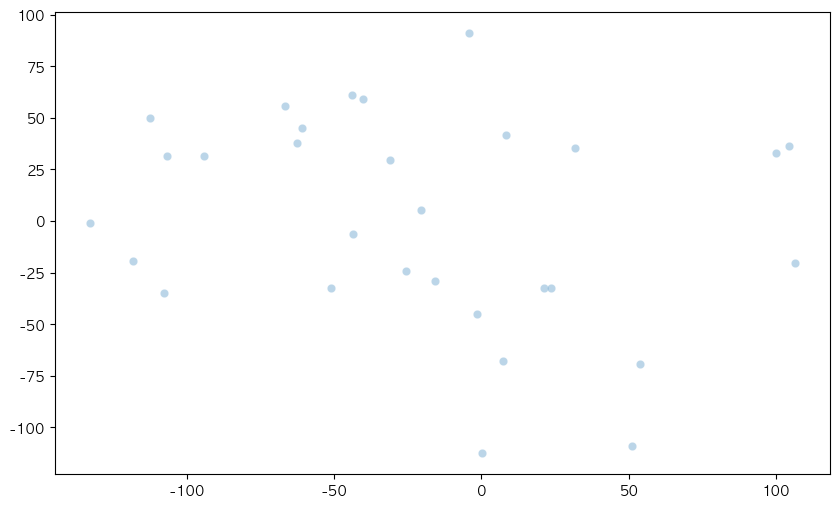

In [54]:
show_tsne('../data/topic2/trust_robot.csv')